In [7]:
import pandas as pd

df=pd.read_csv('/content/Sarcasm Dataset.csv')
df=df.drop('Unnamed: 0', axis=1)
df.head()

,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0


# Custome data with Cleaning...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3468 entries, 0 to 3467
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet                3467 non-null   object 
 1   sarcastic            3468 non-null   int64  
 2   sarcasm              867 non-null    float64
 3   irony                867 non-null    float64
 4   satire               867 non-null    float64
 5   understatement       867 non-null    float64
 6   overstatement        867 non-null    float64
 7   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 216.9+ KB


In [9]:
type(df['tweet'][0])

str

# Text Preprocessing Techniques

In [22]:
import re
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):

  #Handle non-string inputs

  """
  1. We've added a check at the beginning of the preprocess_text function using isinstance(text, str) to determine if the input text is a string.
  2. If text is not a string, we convert it to a string using str(text) before proceeding with the regular expression operations.

  """
  if not isinstance(text, str):
    text = str(text)
  # Remove URLs
  text=re.sub(r'http\S+', '', text)

  # Remove Email
  text=re.sub(r'\S+@\S+', '', text)

  # Remove Emojis
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)

  text=emoji_pattern.sub(r'', text)

  # Remove Punctuation
  text=re.sub(r'[^\w\s]', '', text)

  # Convert to Lowercase
  text=text.lower()

  # Extra white Space
  text=re.sub(r'\s+', ' ', text)


  # Remove HTML Tags
  text=re.sub(r'<.*?>', '', text)

  # Remove hashtag
  text=re.sub(r'#\w+', '', text)

   # Remove the specific symbol "_ツ_"
  text = text.replace("_ツ_", "")

  # Remove stopwords
  doc = nlp(text)

  # Remove stopwords
  filtered_words = [token.text for token in doc if not token.is_stop]


  # Join the filtered words to form a clean text
  text = ' '.join(filtered_words)

  return text

In [23]:
df['tweet'][0]

'The only thing I got from college is a caffeine addiction'

In [24]:
print(preprocess_text(df['tweet'][1000]))

wish facebook introduce rude option like panel feel wow nt cover maybe middle finger


In [25]:
df['cleaned_tweet_text']=df['tweet'].apply(lambda x: preprocess_text(x))
df.head()

,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,cleaned_tweet_text
0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0,thing got college caffeine addiction
1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0,love professors draw big question mark answer ...
2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0,remember emails companies covid started gettin...
3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0,today poppop told forced college okay sure sur...
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0,volphancarol littlewhitty mysticalmanatee repo...


# Train Test Split

In [26]:
df.shape

(3468, 9)

In [27]:
df['sarcastic'].value_counts()

,count
sarcastic,
0,2601
1,867


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['cleaned_tweet_text'], df['sarcastic'], test_size=0.2, random_state=42)
#shape of the splitted data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
#

Shape of X_train: (2774,)
Shape of X_test: (694,)
Shape of y_train: (2774,)
Shape of y_test: (694,)


# Sarcastic column is suffering from imbalance datasets which creats a problem for us.

In [29]:
import numpy as np
type(df['cleaned_tweet_text'])
#print(np.array(df['cleaned_tweet_text'][0]))
# however oversampling need 2-D array to deal with the imbalance dataset

print(np.array(df['cleaned_tweet_text']).reshape(-1,1))

[['thing got college caffeine addiction']
 ['love professors draw big question mark answer exam m like yeah nt']
 ['remember emails companies covid started getting real ve gotten regards support protests savagexfenty shared helpful links actually said black lives matter love capitalism']
 ...
 ['m finally surfacing holiday scotland difficult days ill child hopefully mend happy september smell pencil shavings new notebook aroma 1st sept lot promising 1st january']
 ['nt prouder today student got gcses morning 18 months challenge history stage lives teachers amazing job gcseresults2021 gcseresults']
 ['overheard 13 year old games friend smell like tartare sauce montypythonesquedisses']]


In [30]:
# to overcome from imbalance dataset we apply oversampling
from imblearn.over_sampling import RandomOverSampler
import numpy as np

def balance_df(df,text,target):
  ros=RandomOverSampler()
  train_x,train_y=ros.fit_resample(np.array(df[text]).reshape(-1,1),np.array(df[target]).reshape(-1,1))

  new_df=pd.DataFrame(list(zip([x[0] for x in train_x],train_y)), columns=[text,target])

  return new_df

In [31]:
new_df=balance_df(df,'cleaned_tweet_text','sarcastic')
new_df

,cleaned_tweet_text,sarcastic
0,thing got college caffeine addiction,1
1,love professors draw big question mark answer ...,1
2,remember emails companies covid started gettin...,1
3,today poppop told forced college okay sure sur...,1
4,volphancarol littlewhitty mysticalmanatee repo...,1
...,...,...
5197,people security cameras protection acts dvr,1
5198,justice,1
5199,banalincolnlogs red guy s hot nt come,1
5200,accidentally followed ccd guidelines instead c...,1


In [32]:
new_df['sarcastic'].value_counts()
#

,count
sarcastic,
1,2601
0,2601


In [33]:
X=new_df['cleaned_tweet_text']
y=new_df['sarcastic']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4161,)
Shape of X_test: (1041,)
Shape of y_train: (4161,)
Shape of y_test: (1041,)


In [34]:
y_train

,sarcastic
5024,1
3697,1
4763,1
1813,0
283,1
1765,0
3336,0
3536,1
1533,0
3271,0


# Downloading Pretrained Bert and Tokenizer

In [35]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer

In [36]:
model=TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [37]:
# Main game is started now

# Tokenization and encoding(padding, Truncation, max length)
sample_text=['how are you',"I am not good and very furstated"]
tokenizer(sample_text , padding=True)
# CLS[0],,,,,SEP[-1]

{'input_ids': [[101, 2129, 2024, 2017, 102, 0, 0, 0, 0, 0, 0], [101, 1045, 2572, 2025, 2204, 1998, 2200, 6519, 9153, 3064, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [38]:
max_sent_length=max(len(text) for text in df['cleaned_tweet_text'])
max_sent_length


231

In [39]:
# X_train.tolist()

In [40]:
train_embedding=tokenizer(list(X_train), truncation=True, padding=True, max_length=max_sent_length)
test_embedding=tokenizer(list(X_test), truncation=True, padding=True, max_length=max_sent_length)
# train_embedding

In [41]:
# x = [[1, 2, 3, 4], [3, 4, 5, 4]]
# # Convert the list of lists into a dictionary where the first element of each sublist is the key
# # and the second element is the value. Discard the rest.
# result_dict = {sublist[0]: sublist[1] for sublist in x}
# print(result_dict)  # Output: {1: 2, 3: 4}


# Converting train embedding and test embedding into tensorflow datasets

In [42]:
train_dataset=tf.data.Dataset.from_tensor_slices((
    dict(train_embedding),
    y_train
))

test_dataset=tf.data.Dataset.from_tensor_slices((
    dict(test_embedding),
    y_test
))

In [43]:
train_dataset

<_TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(70,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(70,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>

# Fine Tuning Bert and Training

Its taking a bit long time to run for all the 10 Epoches

In [44]:
optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5)
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics=['accuracy']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history =model.fit(train_dataset.shuffle(100).batch(16), epochs=2, batch_size=16, validation_data=test_dataset.shuffle(100).batch(16))
#

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
261/261 [==============================] - 1956s 7s/step - loss: 0.6866 - accuracy: 0.5455 - val_loss: 0.6137 - val_accuracy: 0.6657
Epoch 2/2
261/261 [==============================] - 1840s 7s/step - loss: 0.4252 - accuracy: 0.8063 - val_loss: 0.4303 - val_accuracy: 0.8156


# Train and Validation Loss

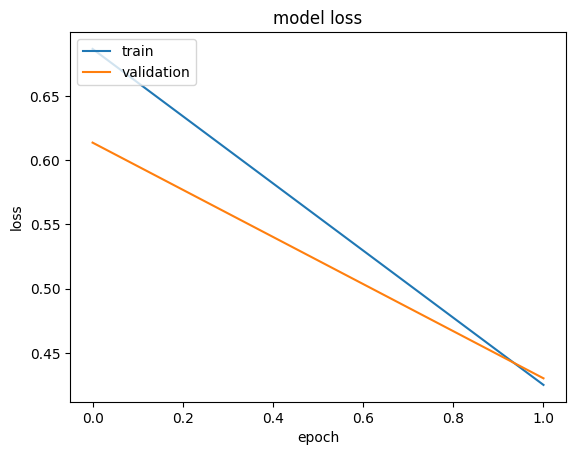

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

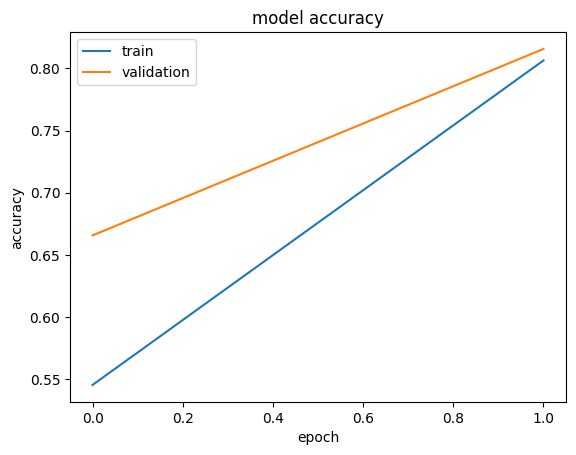

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix,classification_report
print(model.predict(test_dataset.batch(16)))



66/66 [==============================] - 112s 2s/step
TFSequenceClassifierOutput(loss=None, logits=array([[ 1.0123894, -0.8810579],
       [ 1.8891146, -1.7823658],
       [-2.0338674,  1.949426 ],
       ...,
       [-2.370107 ,  2.2340465],
       [-2.1898124,  2.0924387],
       [ 1.6500517, -1.6054437]], dtype=float32), hidden_states=None, attentions=None)


In [48]:
y_prob=model.predict(test_dataset.batch(16))
y_pred=np.argmax(y_prob.logits,axis=1)
print(y_pred)

66/66 [==============================] - 105s 2s/step
[0 0 1 ... 1 1 0]


In [49]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[426,  59],
       [133, 423]])

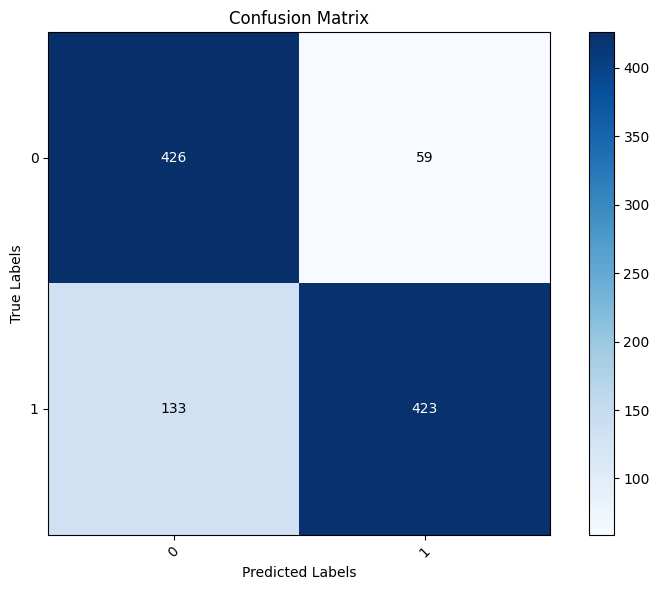

In [50]:
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_test)))
plt.xticks(tick_marks, set(y_test), rotation=45)
plt.yticks(tick_marks, set(y_test))

thresh=cm.max()/2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()

# Classification Report

In [51]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       485
           1       0.88      0.76      0.82       556

    accuracy                           0.82      1041
   macro avg       0.82      0.82      0.82      1041
weighted avg       0.82      0.82      0.82      1041



# Save and Load Model

In [60]:
# Assuming 'my_distil_bert_model' is a directory within '/content/Bert_fine_tune'
# containing the necessary model files (like 'config.json', 'tf_model.h5' etc.
model.save_pretrained("/content/Bert_fine_tune/my_distil_bert_model.h5")

# Predictive System

In [62]:
def predict_sarcasm(text):
  text=preprocess_text(text)
  input_embedding=tokenizer(text, truncation=True, padding=True, max_length=max_sent_length,return_tensors='tf')
  output_logits=model(input_embedding).logits
  probabilites=tf.nn.softmax(output_logits).numpy()
  pred_label=np.argmax(probabilites,axis=1)
  return pred_label

text=df['tweet'][1000]
print("predicted_label: ", predict_sarcasm(text))
#
actaul_label=df['sarcastic'][1000]
print("Actual_label: ",actaul_label)


predicted_label:  [0]
Actual_label:  0


In [63]:
predict_by_model=predict_sarcasm(text)
if predict_by_model==1:
  print("Sarcastic")
else:
  print("Not Sarcastic")


Not Sarcastic
